11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


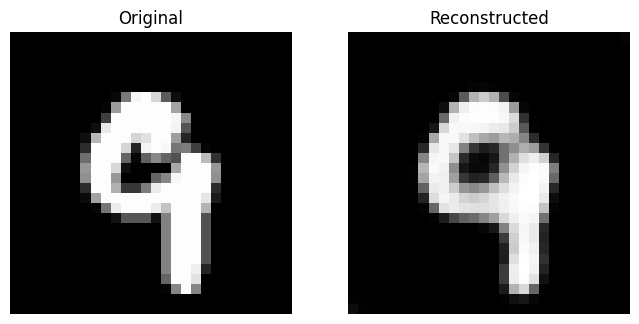

MSE: 0.008268


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from sklearn.metrics import mean_squared_error

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
x_train, x_test = x_train[..., None], x_test[..., None]

# Define model
model = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(1, 3, activation='sigmoid', padding='same')
])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=1, batch_size=256, validation_data=(x_test, x_test), verbose=0)

# Predict and visualize
idx = np.random.randint(len(x_test))
pred = model.predict(x_test[idx:idx+1])[0]

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(x_test[idx].squeeze(), cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Reconstructed")
plt.imshow(pred.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

# Calculate MSE
mse = mean_squared_error(x_test[idx].flatten(), pred.flatten())
print(f"MSE: {mse:.6f}")
